CUSTOMER CHURN PREDICTION

TARGET VARAIBLE: CHURN(yes/no)

PROBLEM: CLASSIFICATION PROBLEM

DATA DESCRIPTION

CustomerID: ID  of teh customer

CustomerName: Name of the customer

yearofBirth: year of the customer born

monthofBirth: month of the customer born

dayofBirth: day of the customer born

yearofEntry: year when customer registered in bank

monthofEntry: month when customer registered in bank

dayofEntry: day when customer registered in bank

Gender: sex of the person(male/female)

Location: Location of the customer

Education: Educational background of the customer

MaritalStatus: either the customer married or not

Occupation: Occupation of the customer

Ownhouse: customer having a ownhouse or not(yes/no)

CreditScore: creditscore of teh customer

AccountBalance: Account balance of the customer

IsCreditCardCustomer: is customer having a credit card are not?(1/0)

ActiveMember: is the customer active member are not(0/1)

Salary: Salary of teh customer

churn: is the customer left from bank or not?(yes/no)

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import date,datetime,timedelta
import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the train data and test data
data=pd.read_csv('../input/Train.csv')
test=pd.read_csv('../input/Test.csv')

In [3]:
data.head()

,CustomerID,CustomerName,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,...,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn
0,C5814651,Name_5814651,1980,5,12,2014,11,28,Male,Location11,...,divorced,management,no,716,0.00,2,1,0,189678.70,No
1,C6465787,Name_6465787,1986,12,28,2011,8,17,Female,Location13,...,divorced,admin.,no,568,169399.60,1,1,0,61936.22,No
2,C3824349,Name_3824349,1999,11,23,2013,12,9,Male,Location13,...,married,unknown,unknown,739,89750.21,1,1,0,193008.52,No
3,C8431888,Name_8431888,1969,4,6,2015,12,12,Female,Location11,...,married,admin.,yes,678,204510.94,1,0,1,738.88,Yes
4,C2944860,Name_2944860,1993,6,15,2012,10,10,Male,Location13,...,single,management,no,670,0.00,2,1,1,78358.94,No


In [4]:
#checking shape of the data
data.shape

(7360, 21)

In [5]:
#checking NA's  values 
data.isna().sum()

CustomerID              0
CustomerName            0
yearofBirth             0
monthofBirth            0
dayofBirth              0
yearofEntry             0
monthofEntry            0
dayofEntry              0
Gender                  0
Location                0
Education               0
MaritalStatus           0
Occupation              0
Ownhouse                0
CreditScore             0
AccountBalance          0
NumberOfProducts        0
IsCreditCardCustomer    0
ActiveMember            0
Salary                  0
Churn                   0
dtype: int64

In [6]:
#checking statistics for every column
data.describe(include='all')


,CustomerID,CustomerName,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,...,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary,Churn
count,7360,7360,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360,7360,...,7360,7360,7360,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360.000000,7360
unique,7360,7360,NaN,NaN,NaN,NaN,NaN,NaN,2,3,...,3,7,3,NaN,NaN,NaN,NaN,NaN,NaN,2
top,C2719825,Name_5539629,NaN,NaN,NaN,NaN,NaN,NaN,Male,Location11,...,single,admin.,no,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN,3994,3693,...,2559,3207,3684,NaN,NaN,NaN,NaN,NaN,NaN,5868
mean,NaN,NaN,1979.058832,6.540897,14.607201,2012.984783,6.477174,14.505571,NaN,NaN,...,NaN,NaN,NaN,650.648777,76601.068011,1.524592,0.704212,0.510462,99967.894062,NaN
std,NaN,NaN,10.464673,3.432135,8.068158,2.898385,3.433252,8.020220,NaN,NaN,...,NaN,NaN,NaN,96.769231,62442.214871,0.577415,0.456427,0.499924,57342.390262,NaN
min,NaN,NaN,1926.000000,1.000000,1.000000,2008.000000,1.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,350.000000,0.000000,1.000000,0.000000,0.000000,11.580000,NaN
25%,NaN,NaN,1974.000000,4.000000,8.000000,2010.000000,4.000000,8.000000,NaN,NaN,...,NaN,NaN,NaN,584.000000,0.000000,1.000000,0.000000,0.000000,51361.780000,NaN
50%,NaN,NaN,1981.000000,7.000000,15.000000,2013.000000,6.000000,15.000000,NaN,NaN,...,NaN,NaN,NaN,652.000000,96913.725000,1.000000,1.000000,1.000000,99446.940000,NaN
75%,NaN,NaN,1986.000000,10.000000,22.000000,2015.250000,9.000000,21.000000,NaN,NaN,...,NaN,NaN,NaN,718.000000,127660.767500,2.000000,1.000000,1.000000,149068.075000,NaN


In [7]:
#checking data types 
data.dtypes

CustomerID               object
CustomerName             object
yearofBirth               int64
monthofBirth              int64
dayofBirth                int64
yearofEntry               int64
monthofEntry              int64
dayofEntry                int64
Gender                   object
Location                 object
Education                object
MaritalStatus            object
Occupation               object
Ownhouse                 object
CreditScore               int64
AccountBalance          float64
NumberOfProducts          int64
IsCreditCardCustomer      int64
ActiveMember              int64
Salary                  float64
Churn                    object
dtype: object

In [8]:
#droping the unwanted columns
data.drop('CustomerID',axis=1,inplace=True)
data.drop('CustomerName',axis=1,inplace=True)

In [9]:
#creating a new Dateof birth column from yearofbirth,monthofbirth,dayoofbirth
data['Dateofbirth'] = pd.to_datetime(
data[['yearofBirth', 'monthofBirth', 'dayofBirth']].astype(str).agg('-'.join, axis=1))

#creating a year column from dateofbirth
data['year']=data['Dateofbirth'].dt.year

#adding a new column AGE from present year and year of birth
data['age']=2019-data['year']


Text(0.5, 1.0, 'distribution of Levels in churn ')

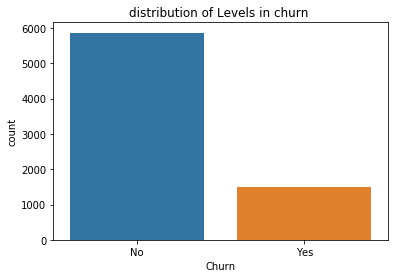

In [10]:
sns.countplot(data.Churn)
plt.title("distribution of Levels in churn ")

Text(0.5, 1.0, 'No of categories in occupation')

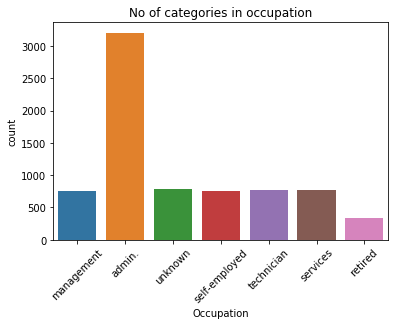

In [11]:
sns.countplot(data.Occupation)
plt.xticks(rotation=45)
plt.title('No of categories in occupation')

Text(0.5, 1.0, 'distribution for account balance')

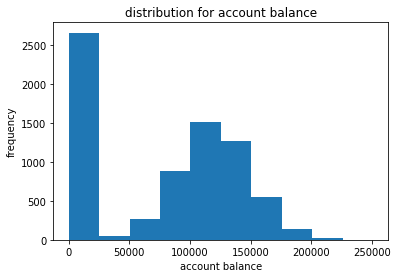

In [12]:
#histogram for account balance
plt.hist(data.AccountBalance,bins=10)
plt.xlabel("account balance")
plt.ylabel("frequency")
plt.title("distribution for account balance")


Text(0.5, 1.0, 'churn vs CreditScore')

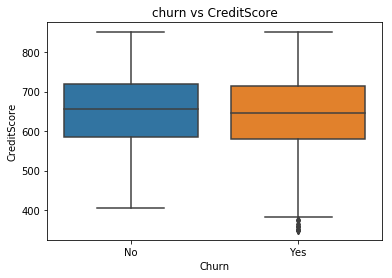

In [13]:
sns.boxplot(x='Churn',y='CreditScore',data=data)
plt.title("churn vs CreditScore")

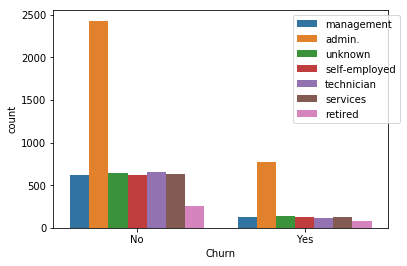

In [14]:
sns.countplot(x='Churn',hue='Occupation',data=data)
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.5)

Text(0.5, 1.0, 'churn vs Salary')

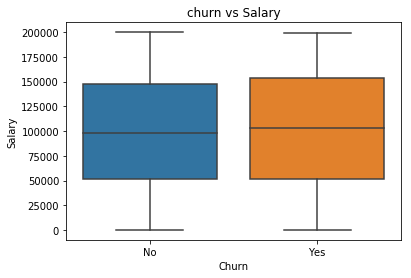

In [15]:
sns.boxplot(x='Churn',y='Salary',data=data)
plt.title("churn vs Salary")

Text(0.5, 1.0, 'churn vs age')

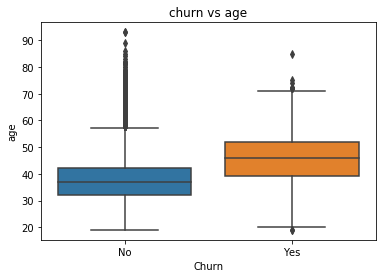

In [16]:
#churn vs age,here we can observe that the churn rate is more between 40-50 age 
sns.boxplot(x=data.Churn,y=data.age)
plt.title("churn vs age")

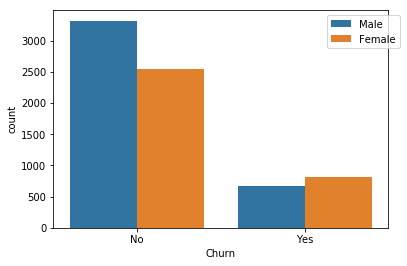

In [17]:
sns.countplot(x='Churn',hue='Gender',data=data)
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.5)

In [18]:
#droping year column
data.drop('year',axis=1,inplace=True)

In [19]:
#creating lists of categorical and numerical columns
cat_cols=['Gender','Location','Education','MaritalStatus','Occupation','Ownhouse']
num_cols=['yearofBirth','monthofBirth','dayofBirth','yearofEntry','monthofEntry','dayofEntry','CreditScore','AccountBalance','NumberOfProducts','IsCreditCardCustomer','ActiveMember','Salary']


In [20]:
#separating the independent and dependent column
y=data.Churn
X=data
X.drop('Churn',axis=1,inplace=True)

In [21]:
#spliting the train data into train_X,train_y,valid_X,valid_y
train_X,valid_X,train_y,valid_y=train_test_split(X,y,train_size=0.7,random_state=1)

#printing the shape of train_X,train_y,validation_X,validation_y
print(train_X.shape)
print(valid_X.shape)
print(train_y.shape)
print(valid_y.shape)

(5152, 20)
(2208, 20)
(5152,)
(2208,)


In [22]:
#deleting the Dateofbirth column since we added new column called 'AGE'
train_X.drop('Dateofbirth',axis=1,inplace=True)

#CONVERTING THE DATATYPES TO FLOAT AND CATEGORIC
train_X[cat_cols]=train_X[cat_cols].apply(lambda x:x.astype("category"))
train_X[num_cols]=train_X[num_cols].apply(lambda x:x.astype("float"))

In [23]:
train_num_data=train_X.loc[:,num_cols]
train_cat_data=train_X.loc[:,cat_cols]

In [24]:
from sklearn.preprocessing import StandardScaler
stand=StandardScaler()
stand.fit(train_num_data[train_num_data.columns])
train_num_data[train_num_data.columns]=stand.transform(train_num_data[train_num_data.columns])

In [25]:
train_X=pd.concat([train_num_data,train_cat_data],axis=1)

#creating dummies 
train_X=pd.get_dummies(train_X,columns=cat_cols)

In [26]:
#PREPROCESSING ON VALIDATION DATA
#droping dateofbirth column since we calculated age column
valid_X.drop('Dateofbirth',axis=1,inplace=True)

#CONVERTING THE DATATYPES TO FLOAT AND CATEGORIC
valid_X[cat_cols]=valid_X[cat_cols].apply(lambda x:x.astype("category"))
valid_X[num_cols]=valid_X[num_cols].apply(lambda x:x.astype("float"))

valid_num_data=valid_X.loc[:,num_cols]
valid_cat_data=valid_X.loc[:,cat_cols]

valid_num_data[valid_num_data.columns]=stand.transform(valid_num_data[valid_num_data.columns])

valid_X=pd.concat([valid_num_data,valid_cat_data],axis=1)

#creating dummies 
valid_X=pd.get_dummies(valid_X,columns=cat_cols)

In [27]:
#checking the shape of train_X,validation_X
print(valid_X.shape)
print(train_X.shape)

(2208, 34)
(5152, 34)


In [28]:
test.head()

,CustomerID,CustomerName,yearofBirth,monthofBirth,dayofBirth,yearofEntry,monthofEntry,dayofEntry,Gender,Location,Education,MaritalStatus,Occupation,Ownhouse,CreditScore,AccountBalance,NumberOfProducts,IsCreditCardCustomer,ActiveMember,Salary
0,C5993228,Name_5993228,1972,5,5,2015,12,16,Male,Location13,unknown,single,management,yes,624,0.00,2,1,1,62825.03
1,C6546925,Name_6546925,1990,12,27,2016,11,26,Female,Location11,primary,married,admin.,yes,777,134571.50,1,0,1,118313.38
2,C7491750,Name_7491750,1966,7,25,2011,10,24,Female,Location13,primary,married,admin.,yes,707,0.00,1,1,0,109688.82
3,C8462011,Name_8462011,1983,7,7,2016,7,9,Male,Location11,secondary,divorced,management,no,746,172274.01,1,1,0,22374.97
4,C3187447,Name_3187447,1983,8,9,2009,5,15,Male,Location11,tertiary,divorced,management,no,762,0.00,2,1,1,43075.70


In [29]:
#keeping the CustomerID in custid variable for submission along with test predictions
custid=test.CustomerID


In [30]:
#preprocessing on test droping unwanted columns
test.drop('CustomerID',axis=1,inplace=True)
test.drop('CustomerName',axis=1,inplace=True)

#creating a new dateofbirth column from year of birth,month of birth,day of birth
test['Dateofbirth'] = pd.to_datetime(
test[['yearofBirth', 'monthofBirth', 'dayofBirth']].astype(str).agg('-'.join, axis=1))

#creating year column from dateofbirth for calculating age 
test['year']=test['Dateofbirth'].dt.year

#creating new "age" column subrating from present year and yearofbirth
test['age']=2019-test['year']

#and droping year column
test.drop('year',axis=1,inplace=True)

#droping dateofbirth column from test
test.drop('Dateofbirth',axis=1,inplace=True)

In [31]:
#CONVERTING THE DATATYPES TO FLOAT AND CATEGORIC
test[cat_cols]=test[cat_cols].apply(lambda x:x.astype("category"))
test[num_cols]=test[num_cols].apply(lambda x:x.astype("float"))

test_num_data=test.loc[:,num_cols]
test_cat_data=test.loc[:,cat_cols]

test_num_data[test_num_data.columns]=stand.transform(test_num_data[test_num_data.columns])

test=pd.concat([test_num_data,test_cat_data],axis=1)

#creating dummies 
test=pd.get_dummies(test,columns=cat_cols)

In [32]:
#checking shape for train_X,valdiation_X,test data
print(train_X.shape)
print(valid_X.shape)
print(test.shape)

(5152, 34)
(2208, 34)
(1840, 34)


In [33]:
#MODEL1 LOGISTIC MODEL
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score

#fitting the model on train_X,TRAIN_Y
log=LogisticRegression()
log.fit(train_X,train_y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
#prediction on train_x,validation_x using logistic model and storing it in variables 
train_preds1=log.predict(train_X)
valid_preds1=log.predict(valid_X)

In [35]:
#checking model performance using accuaracy and recall
print("accuracy on train data:",classification_report(train_y,train_preds1))
print("accuracy on validation data:",classification_report(valid_y,valid_preds1))
train_score1=accuracy_score(train_y,train_preds1)
valid_score1=accuracy_score(valid_y,valid_preds1)

accuracy on train data:               precision    recall  f1-score   support

          No       0.84      0.97      0.90      4106
         Yes       0.67      0.28      0.40      1046

    accuracy                           0.83      5152
   macro avg       0.76      0.62      0.65      5152
weighted avg       0.81      0.83      0.80      5152

accuracy on validation data:               precision    recall  f1-score   support

          No       0.84      0.96      0.90      1762
         Yes       0.64      0.26      0.37       446

    accuracy                           0.82      2208
   macro avg       0.74      0.61      0.63      2208
weighted avg       0.80      0.82      0.79      2208



In [36]:
#creating a function which will plot learning curves for our model
#which will help us get bias and variance
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)#if y limits are given consider the specified limits
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    #getting means and std for train and test for particular train_sizes
    #with specified cv.
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    #creating connections between the training score points since we only get points.
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    #similarly for cross validation
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

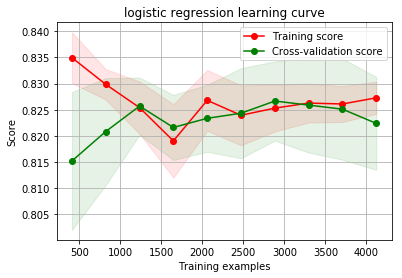

In [37]:
plot_learning_curve(log,'logistic regression learning curve',train_X,train_y,ylim=None, cv=5,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10))

In [38]:
#MODEL2 DECISION TREE CLASSIFIER AND FITTING ON TRAIN AND VALIDATION
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(train_X,train_y)

#predicting on train_X,valdiation_x and storing in variables
train_preds2=dtc.predict(train_X)
valid_preds2=dtc.predict(valid_X)

In [39]:
#checking accuracy and recall on train and validation
print("accuracy on train data:",classification_report(train_y,train_preds2))
print("accuracy on validation data:",classification_report(valid_y,valid_preds2))
train_score2=accuracy_score(train_y,train_preds2)
valid_score2=accuracy_score(valid_y,valid_preds2)

accuracy on train data:               precision    recall  f1-score   support

          No       1.00      1.00      1.00      4106
         Yes       1.00      1.00      1.00      1046

    accuracy                           1.00      5152
   macro avg       1.00      1.00      1.00      5152
weighted avg       1.00      1.00      1.00      5152

accuracy on validation data:               precision    recall  f1-score   support

          No       0.86      0.86      0.86      1762
         Yes       0.45      0.47      0.46       446

    accuracy                           0.78      2208
   macro avg       0.66      0.66      0.66      2208
weighted avg       0.78      0.78      0.78      2208



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

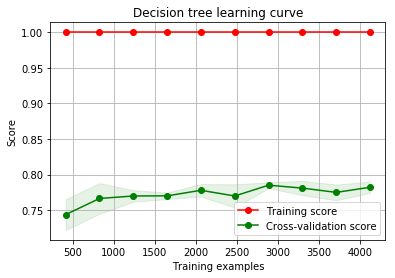

In [40]:
plot_learning_curve(dtc,'Decision tree learning curve',train_X,train_y,ylim=None, cv=5,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10))

In [41]:
#MODEL3 KNN CLASIFIER
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(train_X,train_y)

#predicting on train and validation
train_preds3=knn.predict(train_X)
valid_preds3=knn.predict(valid_X)

#checking accuarcy score on train and validation
print("accuracy_score on train data:",accuracy_score(train_y,train_preds3))
print("accuracy_score on validaion data:",accuracy_score(valid_y,valid_preds3))

train_score3=accuracy_score(train_y,train_preds3)
valid_score3=accuracy_score(valid_y,valid_preds3)

accuracy_score on train data: 0.8651009316770186
accuracy_score on validaion data: 0.8147644927536232


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

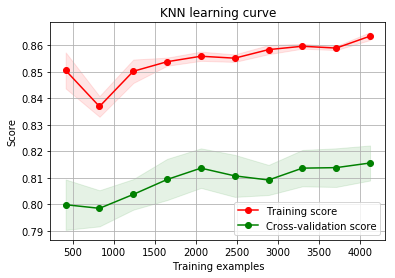

In [42]:
plot_learning_curve(knn,'KNN learning curve',train_X,train_y,ylim=None, cv=5,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10))

In [43]:
#MODEL 4
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc=SVC()

 
param_grid = {

'C': [0.001, 0.01, 0.1, 1, 10],
'gamma': [0.001, 0.01, 0.1, 1], 
'kernel':['linear','rbf']}

 
svc_cv = GridSearchCV(estimator = svc, param_grid = param_grid, cv = 10,n_jobs=-1)

In [44]:
svc_cv.fit(train_X,train_y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [45]:
svc_cv.best_estimator_.fit(train_X,train_y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
#predicting on train and validation
train_preds4=svc_cv.best_estimator_.predict(train_X)
valid_preds4=svc_cv.best_estimator_.predict(valid_X)

In [47]:
#checking accuarcy score on train and validation
print("accuracy_score on train data:",accuracy_score(train_y,train_preds4))
print("accuracy_score on validaion data:",accuracy_score(valid_y,valid_preds4))

train_score4=accuracy_score(train_y,train_preds4)
valid_score4=accuracy_score(valid_y,valid_preds4)

accuracy_score on train data: 0.8621894409937888
accuracy_score on validaion data: 0.8473731884057971


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

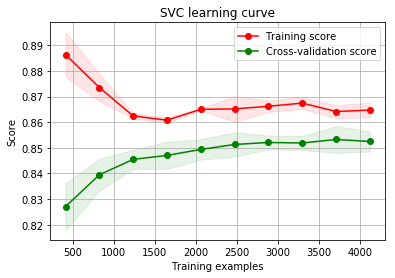

In [48]:
plot_learning_curve(svc_cv.best_estimator_,'SVC learning curve',train_X,train_y,ylim=None, cv=5,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10))

In [49]:
#MODEL 5
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

max_depth=[4,6,8,10]
min_samples_leaf=[0.06,0.08,0.10]
max_features=[0.02,0.04,0.06,0.08]

params={
    "max_depth":max_depth,
    "min_samples_leaf": min_samples_leaf,
    "max_features": max_features,
}

grid=GridSearchCV(estimator=rfc,param_grid=params,cv=5,n_jobs=-1)
grid.fit(train_X,train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [50]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features=0.02, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.06, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
#getting best estimator from grid search and fitting on train_x,train_y
grid.best_estimator_.fit(train_X,train_y)

#prediction on train and validation 
train_preds5=grid.predict(train_X)
valid_preds5=grid.predict(valid_X)


In [52]:
#checking the model performance using accuracy score on train and validation
print("accuracy_score on train data:",accuracy_score(train_y,train_preds5))
print("accuracy_score on validaion data:",accuracy_score(valid_y,valid_preds5))

train_score5=accuracy_score(train_y,train_preds5)
valid_score5=accuracy_score(valid_y,valid_preds5)

accuracy_score on train data: 0.796972049689441
accuracy_score on validaion data: 0.7980072463768116


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

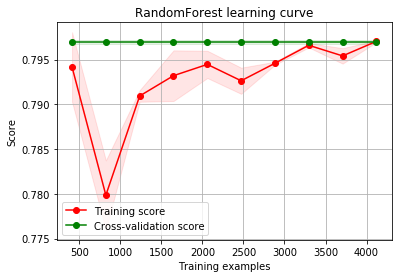

In [53]:
plot_learning_curve(grid.best_estimator_,'RandomForest learning curve',train_X,train_y,ylim=None, cv=5,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10))

In [54]:
#MODEL 6
#importing Randomsearchcv and creating hyperparameters for XGboost 
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
xgb2=XGBClassifier()
n_estimaters=[50,100,150,200]
max_depth=[2,3,5,7]
learnin_rate=[0.05,0.1,0.15,0.20]
min_child_wgt=[1,2,3,4]



hyperparameter={
    "n_estimaters":n_estimaters,
    "max_depth":max_depth,
    "learnin_rate":learnin_rate,
    "min_child_wgt":min_child_wgt,

}

# using RandomizedSearchCV for 5 fold cross validation XGboost as estimator
random_cv2=RandomizedSearchCV(estimator=xgb2,param_distributions=hyperparameter,cv=5,n_jobs=-1)

#fitting on trainx,trainy
random_cv2.fit(train_X,train_y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
          

In [55]:
random_cv2.best_estimator_.fit(train_X,train_y)

#and predicting on trainx and validationx using best estimator
train_preds6=random_cv2.best_estimator_.predict(train_X)
valid_preds6=random_cv2.best_estimator_.predict(valid_X)

In [56]:
#checking the model performance using accuracy score on train and validation
print("accuracy_score on train data:",accuracy_score(train_y,train_preds6))
print("accuracy_score on validaion data:",accuracy_score(valid_y,valid_preds6))

train_score6=accuracy_score(train_y,train_preds6)
valid_score6=accuracy_score(valid_y,valid_preds6)

accuracy_score on train data: 0.876358695652174
accuracy_score on validaion data: 0.8564311594202898


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

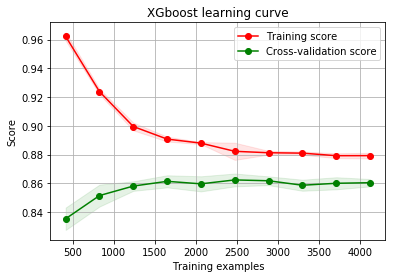

In [57]:
plot_learning_curve(random_cv2.best_estimator_,'XGboost learning curve',train_X,train_y,ylim=None, cv=5,n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10))

In [58]:
results=pd.DataFrame({
    "Model":["Logistic_Regression","Decision_tree","KNN","SVC","RandomForest","XgBOOST"],
    "train_score":[train_score1,train_score2,train_score3,train_score4,train_score5,train_score6],
    "validation_score":[valid_score1,valid_score2,valid_score3,valid_score4,valid_score5,valid_score6]
})

In [59]:
results

,Model,train_score,validation_score
0,Logistic_Regression,0.826087,0.820652
1,Decision_tree,1.000000,0.777627
2,KNN,0.865101,0.814764
3,SVC,0.862189,0.847373
4,RandomForest,0.796972,0.798007
5,XgBOOST,0.876359,0.856431


In [60]:
test_predictions=random_cv2.best_estimator_.predict(test)

In [61]:
test_predictions=pd.DataFrame(test_predictions,custid.values)

In [62]:
test_predictions

,0
C5993228,No
C6546925,No
C7491750,Yes
C8462011,No
C3187447,No
...,...
C5458876,No
C4306823,No
C2409933,No
C5212350,No
